# Crime Against Children in India (2001-2014)  
### An Exploratory Data Analysis

EDA by: **Muhsina Elampilakkattil**  
Date: June 9, 2019

This dataset reflects reported incidents of crime that occurred in the in India against children from 2001 to 2014. 

The dataset used for EDA in this project is downloaded from **[data.gov.in](https://data.gov.in/catalog/crime-committed-against-children-under-different-crime-heads)**. 

The data refers to State/UT & crime head wise insident of crime commited against children.

**Released Under:** National Data Sharing and Accessibility Policy(NDSAP)
**Contributer:** Ministry of Home AffairsDepartment of StatesNational Crime Records Bureau (NCRB)  
**Published on Data Portal:** April 07, 2016 

## Loading Packages

We will be using Python explore the data. To analyse the data we need to load some libraries and datasets .

In [161]:
#Load necessary packages
import pandas as pd
import numpy as np    #for mathematical calculations
import seaborn as sns    #For data visualization
import matplotlib.pyplot as plt  #For ploting graphs

from urllib.request import urlopen
#import BeauifulSoup from bs4
from bs4 import BeautifulSoup

import json #library to handle JSON file
import requests #library to handle requests
from pandas.io.json import json_normalize #transform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

import geopandas as gpd

#Allow multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

For this project, we have collected three CSV files from [data.gov.in](https://data.gov.in/catalog/crime-committed-against-children-under-different-crime-heads). 

- Crime data during 2001-12
- Crime data in 2013
- Crime data in 2014

In [162]:
#Reading data
crime2001_12 = pd.read_csv("dataset/Crime2001-12.csv")
crime2013 = pd.read_csv("dataset/Crime2013.csv")
crime2014 = pd.read_csv("dataset/Crime2014.csv")

## Undersanding Data
Lets look at the structure of the datasets. 

In [163]:
#Check the features
crime2001_12.columns

Index(['STATE/UT', 'Year', 'Infanticide', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of Suicide',
       'Exposure and Abandonment', 'Procuration of Minor Girls',
       'Buying of girls for prostitu tion',
       'Selling of girls for prostitution',
       'Prohibition of Child Marriage Act, 2006', 'Other Crimes',
       'Total Crimes Against Children'],
      dtype='object')

In [164]:
crime2013.columns

Index(['STATE/UT', 'Year', 'Infanticide', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of Suicide',
       'Exposure and Abandonment', 'Procuration of Minor Girls',
       'Buying of girls for prostitu tion',
       'Selling of girls for prostitution',
       'Prohibition of Child Marriage Act, 2006', 'Other Crimes',
       'Total Crimes Against Children'],
      dtype='object')

In [165]:
crime2014.columns

Index(['States/UTs', 'Crime Head', '2014'], dtype='object')

In [166]:
crime2014.head()

,States/UTs,Crime Head,2014
0,Andhra Pradesh,1 - Murder (Section 302 and 303 IPC),45
1,Andhra Pradesh,2 - Infanticide (Section 315 IPC),2
2,Andhra Pradesh,3 - Rape,477
3,Andhra Pradesh,4 - Assault on women with intent to outrage he...,274
4,Andhra Pradesh,4.1 - Sexual Harassment (Section 354A IPC),67


We have similar features in the two datasets crime2001_12 and crime2013. In the crime2014 dataset, the type of crime is recorded in a column named **Crime Head**. And each type of crimes has again falls down to another subcategories. To merge these tables into one we need to clean transform this data as in the other two datasets. 

Before that lets understand the datatypes, shapes and other features in detail.

In [167]:
#datatypes
crime2001_12.dtypes

STATE/UT                                   object
Year                                        int64
Infanticide                                 int64
Murder                                      int64
Rape                                        int64
Kidnapping and Abduction                    int64
Foeticide                                   int64
Abetment of Suicide                         int64
Exposure and Abandonment                    int64
Procuration of Minor Girls                  int64
Buying of girls for prostitu tion           int64
Selling of girls for prostitution           int64
Prohibition of Child Marriage Act, 2006     int64
Other Crimes                                int64
Total Crimes Against Children               int64
dtype: object

In [168]:
crime2013.dtypes

STATE/UT                                   object
Year                                        int64
Infanticide                                 int64
Murder                                      int64
Rape                                        int64
Kidnapping and Abduction                    int64
Foeticide                                   int64
Abetment of Suicide                         int64
Exposure and Abandonment                    int64
Procuration of Minor Girls                  int64
Buying of girls for prostitu tion           int64
Selling of girls for prostitution           int64
Prohibition of Child Marriage Act, 2006     int64
Other Crimes                                int64
Total Crimes Against Children               int64
dtype: object

In [169]:
crime2014.dtypes

States/UTs    object
Crime Head    object
2014           int64
dtype: object

In [170]:
#Shape
crime2001_12.shape
crime2013.shape
crime2014.shape

(456, 15)

(38, 15)

(2028, 3)

In [171]:
crime2001_12.head()

,STATE/UT,Year,Infanticide,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of Suicide,Exposure and Abandonment,Procuration of Minor Girls,Buying of girls for prostitu tion,Selling of girls for prostitution,"Prohibition of Child Marriage Act, 2006",Other Crimes,Total Crimes Against Children
0,ANDHRA PRADESH,2001,1,34,84,57,0,7,22,12,0,0,6,47,270
1,ARUNACHAL PRADESH,2001,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,2001,0,0,0,18,0,0,0,0,0,0,0,0,18
3,BIHAR,2001,0,2,16,26,0,0,1,16,1,1,2,18,83
4,CHHATTISGARH,2001,6,8,150,46,5,1,15,0,0,0,0,354,585


In [172]:
crime2013.head()

,STATE/UT,Year,Infanticide,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of Suicide,Exposure and Abandonment,Procuration of Minor Girls,Buying of girls for prostitu tion,Selling of girls for prostitution,"Prohibition of Child Marriage Act, 2006",Other Crimes,Total Crimes Against Children
0,Andhra Pradesh,2013,7,87,770,1014,7,14,43,40,0,2,16,576,2576
1,Arunachal Pradesh,2013,0,0,35,40,0,0,0,0,0,0,0,7,82
2,Assam,2013,0,14,230,80,0,0,0,129,0,0,1,64,518
3,Bihar,2013,0,101,86,1180,1,0,1,193,0,3,1,14,1580
4,Chhattisgarh,2013,15,49,595,1634,15,95,7,44,0,0,1,1282,3737


In [173]:
#Summary of data
crime2001_12.describe()

,Year,Infanticide,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of Suicide,Exposure and Abandonment,Procuration of Minor Girls,Buying of girls for prostitu tion,Selling of girls for prostitution,"Prohibition of Child Marriage Act, 2006",Other Crimes,Total Crimes Against Children
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,2006.500000,8.342105,103.888158,374.203947,570.697368,8.144737,3.671053,62.440789,26.828947,2.269737,5.046053,7.381579,447.559211,1620.473684
std,3.455844,24.726310,291.675378,1095.863255,1822.446989,24.605746,13.010449,174.977301,99.721796,8.368941,19.656055,22.769442,1314.682331,4698.717825
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.750000,0.000000,1.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,30.750000
50%,2006.500000,0.000000,9.000000,41.000000,37.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,138.000000
75%,2009.250000,3.000000,54.000000,212.750000,308.000000,5.000000,1.000000,24.000000,9.000000,0.000000,0.000000,4.000000,163.000000,982.000000
max,2012.000000,140.000000,1597.000000,8541.000000,18266.000000,210.000000,144.000000,933.000000,862.000000,78.000000,130.000000,169.000000,7411.000000,38172.000000


In [174]:
crime2013.describe()

,Year,Infanticide,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of Suicide,Exposure and Abandonment,Procuration of Minor Girls,Buying of girls for prostitu tion,Selling of girls for prostitution,"Prohibition of Child Marriage Act, 2006",Other Crimes,Total Crimes Against Children
count,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,2013.0,6.473684,130.815789,976.026316,2223.710526,17.447368,16.973684,73.421053,96.631579,0.473684,7.894737,17.526316,1029.236842,4596.631579
std,0.0,18.242713,369.889820,2668.026444,5748.887643,50.204822,50.047268,206.244886,282.485534,1.409175,24.724197,50.091666,2900.788126,12221.188226
min,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,2.000000,26.750000,34.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.750000,86.500000
50%,2013.0,0.000000,21.000000,180.000000,189.500000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,85.500000,820.500000
75%,2013.0,5.500000,71.750000,626.500000,1416.500000,6.250000,4.250000,34.250000,40.750000,0.000000,1.750000,9.750000,456.250000,2564.500000
max,2013.0,82.000000,1657.000000,12363.000000,28167.000000,221.000000,215.000000,930.000000,1224.000000,6.000000,100.000000,222.000000,13037.000000,58224.000000


In [175]:
crime2014.describe()

,2014
count,2028.000000
mean,351.063609
std,3113.808306
min,0.000000
25%,0.000000
50%,1.000000
75%,23.000000
max,89423.000000


**Its clear that there is no missing/null data**

## Total Crime against Children in each state/UT

To visualize the Total crime against children during 2001-2014, the following preprocessing steps have been made to the dataset. 
* Select the **Total Crimes Against Children** and drop the colums showing the crime in each head.
* Change the STATE/UT column in crime2001_12 data to title case
* From the crime2014 dataset fetch the total crime data.
* Set the STATE/UTs column as index
* Merging three datasets into one.
* Reshape the log merged dataset into wide.

## Preprocessing

In [176]:
#Copy the total crime into another dataset
total2001_12 = crime2001_12.copy()[['STATE/UT', 'Year','Total Crimes Against Children']]

#Set State/UT as index
total2001_12 = total2001_12.set_index('STATE/UT')
total2001_12.head()

#convert the STATE/UT column to title case or proper case
total2001_12.index = map(lambda x: x.title(), total2001_12.index)

#name index
total2001_12.index.names = ['States/UTs']
total2001_12.head()

,Year,Total Crimes Against Children
STATE/UT,,
ANDHRA PRADESH,2001,270
ARUNACHAL PRADESH,2001,0
ASSAM,2001,18
BIHAR,2001,83
CHHATTISGARH,2001,585


,Year,Total Crimes Against Children
States/UTs,,
Andhra Pradesh,2001,270
Arunachal Pradesh,2001,0
Assam,2001,18
Bihar,2001,83
Chhattisgarh,2001,585


In [177]:
#Copy the total crime data and set index as STATE/UT
total2013 = crime2013.copy()[['STATE/UT', 'Year','Total Crimes Against Children']].set_index('STATE/UT')

#Rename index 
total2013.index.names = ['States/UTs']
total2013.head()

,Year,Total Crimes Against Children
States/UTs,,
Andhra Pradesh,2013,2576
Arunachal Pradesh,2013,82
Assam,2013,518
Bihar,2013,1580
Chhattisgarh,2013,3737


In [178]:
total2014 = crime2014.copy()
total2014[50:55]

,States/UTs,Crime Head,2014
50,Andhra Pradesh,22 - Other crimes committed against children,380
51,Andhra Pradesh,23 - Total crimes against Children,2059
52,Arunachal Pradesh,1 - Murder (Section 302 and 303 IPC),5
53,Arunachal Pradesh,2 - Infanticide (Section 315 IPC),0
54,Arunachal Pradesh,3 - Rape,43


To get only the total crime in each state/UT we need to select rows matching the string **"Total crimes against Children"** in **Crime Head** column. 

In [179]:
total2014 = total2014[total2014['Crime Head'].str.match('23 - Total crimes against Children')]

#Set the States/UTs column as index
#drop the Crime Head. Its no longer needed
total2014 = total2014.set_index('States/UTs').drop('Crime Head', axis = 1)
total2014.head()

,2014
States/UTs,
Andhra Pradesh,2059
Arunachal Pradesh,134
Assam,1385
Bihar,2255
Chhattisgarh,4358


### Reshape dataframe

In [180]:
#Reshape long dataframe to wide using pivot() function
total2001_12 = total2001_12.pivot(columns='Year', values='Total Crimes Against Children')
total2001_12.head()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
States/UTs,,,,,,,,,,,,
A & N Islands,0,3,6,14,8,9,10,47,41,51,31,28
Andhra Pradesh,270,333,1463,1328,950,1386,1499,1321,1719,1823,2213,2274
Arunachal Pradesh,0,6,18,22,22,27,4,24,33,20,35,39
Assam,18,14,19,21,199,252,167,183,44,197,236,392
Bihar,83,57,56,59,115,66,675,766,1016,1843,2233,2894


In [181]:
#Reshae total2013
total2013 = total2013.pivot(columns='Year', values='Total Crimes Against Children')
total2013.head()

Year,2013
States/UTs,
A&N Islands,54
Andhra Pradesh,2576
Arunachal Pradesh,82
Assam,518
Bihar,1580


### Joining three dataframes
We've done with the preprocessing for the first visualization. Lets merge the three dataframes into one.

In [182]:
#index rename
total2013 = total2013.rename({'A&N Islands': 'A & N Islands', 'D&N Haveli': 'D & N Haveli', 
                              'Delhi UT': 'Delhi'})
total2014 = total2014.rename({'A&N Islands': 'A & N Islands', 'Delhi UT': 'Delhi', 'D&N Haveli': 'D & N Haveli',
                             'Total (All India)': 'Total (All-India)'})

In [183]:
total2001_12.shape
total2013.shape
total2014.shape

(38, 12)

(38, 1)

(39, 1)

In [184]:
total_crime = pd.merge(total2001_12, total2013, left_index = True, right_index = True, how = 'outer')
total_crime = pd.merge(total_crime, total2014, left_index = True, right_index = True, how = 'outer')
total_crime.tail(10)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
States/UTs,,,,,,,,,,,,,,
Telangana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930.0
Total (All-India),10814.0,10469.0,11633.0,14423.0,14975.0,18967.0,20410.0,22500.0,24203.0,26694.0,33052.0,38172.0,58224.0,89423.0
Total (State),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50683.0,NaN
Total (States),9838.0,9703.0,11058.0,13552.0,13866.0,16691.0,18291.0,20486.0,21218.0,22923.0,28668.0,33538.0,NaN,79758.0
Total (UTs),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7541.0,9665.0
Total (Uts),976.0,766.0,575.0,871.0,1109.0,2276.0,2119.0,2014.0,2985.0,3771.0,4384.0,4634.0,NaN,NaN
Tripura,0.0,0.0,0.0,59.0,28.0,41.0,63.0,163.0,163.0,227.0,102.0,20.0,100.0,369.0
Uttar Pradesh,3709.0,1826.0,1702.0,1921.0,1801.0,1767.0,2248.0,4078.0,3085.0,2332.0,5500.0,6033.0,9857.0,14835.0
Uttarakhand,46.0,27.0,23.0,56.0,76.0,51.0,101.0,38.0,33.0,31.0,83.0,122.0,232.0,489.0


In [185]:
total_crime.shape

(41, 14)

In [186]:
total_crime.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
States/UTs,,,,,,,,,,,,,,
A & N Islands,0.0,3.0,6.0,14.0,8.0,9.0,10.0,47.0,41.0,51.0,31.0,28.0,54.0,50.0
Andhra Pradesh,270.0,333.0,1463.0,1328.0,950.0,1386.0,1499.0,1321.0,1719.0,1823.0,2213.0,2274.0,2576.0,2059.0
Arunachal Pradesh,0.0,6.0,18.0,22.0,22.0,27.0,4.0,24.0,33.0,20.0,35.0,39.0,82.0,134.0
Assam,18.0,14.0,19.0,21.0,199.0,252.0,167.0,183.0,44.0,197.0,236.0,392.0,518.0,1385.0
Bihar,83.0,57.0,56.0,59.0,115.0,66.0,675.0,766.0,1016.0,1843.0,2233.0,2894.0,1580.0,2255.0


In [187]:
#Add Telengana crime data with Andhra Pradhesh
total_crime.loc['Andhra Pradesh']['2014'] += total_crime.loc['Telangana']['2014']
total_crime.loc['Telangana'] = total_crime.loc['Andhra Pradesh']
total_crime.loc['Telangana']

2001     270.0
2002     333.0
2003    1463.0
2004    1328.0
2005     950.0
2006    1386.0
2007    1499.0
2008    1321.0
2009    1719.0
2010    1823.0
2011    2213.0
2012    2274.0
2013    2576.0
2014    3989.0
Name: Telangana, dtype: float64

In [188]:
#Check the rows having null values
#total_crime[total_crime.isnull().any(axis= 1)]
total_crime = total_crime.dropna(axis = 0)
total_crime.shape

(37, 14)

## Get Geospatial Data
We have fetched the geospatial data from [distancelatlog](http://www.distancelatlong.com/country/india).

In [189]:
#India Coordinates
#IN_coordinates = (20.5937, 78.9629)

#set the filepath and load in a shape file
fp = "dataset/maps-master/States/Admin2.shp"
map_df = gpd.read_file(fp)

map_df = map_df.set_index('ST_NM')
map_df.index.names = ['States/UTs']
map_df.head()

,geometry
States/UTs,
Andaman & Nicobar Island,(POLYGON ((93.71975948121514 7.207067636262479...
Arunanchal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,..."
Assam,"(POLYGON ((89.74322932956994 26.3036203411059,..."
Bihar,(POLYGON ((84.50719832504274 24.26323103208654...
Chandigarh,"POLYGON ((76.84147287327454 30.75995934035132,..."


In [190]:
#Clean the index
map_df = map_df.rename({'Andaman & Nicobar Island': 'A & N Islands', 'Arunanchal Pradesh': 'Arunachal Pradesh', 
                        'Dadara & Nagar Havelli': 'D & N Haveli', 
                              'NCT of Delhi': 'Delhi'})

### Join the geodataframe with Crime Data

In [191]:
crime_geo = pd.merge(map_df, total_crime, left_index = True, right_index = True, how = 'outer')
#Drop rows which are no longer needed
#crime_geo = crime_geo(['Total (State)', 'Total (States)','Total (UTs)',  'Total (Uts)'])
#crime_geo[crime_geo.isnull().any(axis= 1)]
all_india_crime = crime_geo.loc['Total (All-India)']
#all_india_crime

crime_geo = crime_geo.dropna(axis = 0)

## Visualization
Lets see how the number of crime against children India has changed over time during 2001-2014

<Figure size 800x480 with 0 Axes>

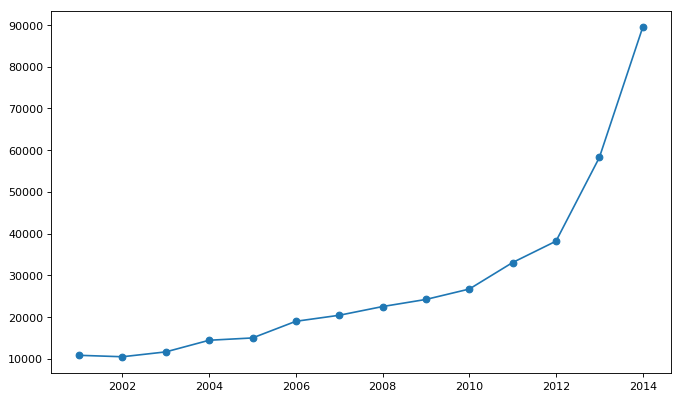

In [192]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

all_india_crime = all_india_crime.dropna()
x = all_india_crime.index
y = all_india_crime.values
plt.plot(x, y, marker = 'o')
plt.show()

Text(0.5, 0.98, 'Crime Agains children in india')

(66.72479680851099, 98.87674485180852, 5.239837141605822, 38.594383817624156)

(66.724796808511, 98.87674485180855, 5.239837141605822, 38.594383817624156)

Text(0.5, 1.0, 'In 2001')

Text(0.5, 1.0, 'In 2013')

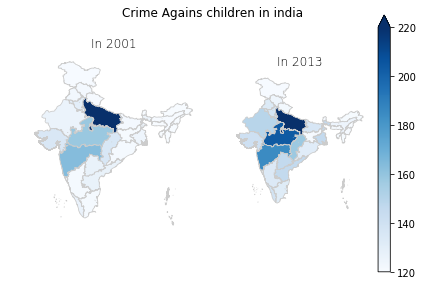

In [199]:


# set the range for the choropleth

vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Crime Agains children in india")
#plt.subplots(ncols = 2, figsize=(10, 6))

#ax1 = fig.add_subplot()
#ax2 = fig.add_subplot()
#plt.subplot(1,2,1)
crime_geo.plot(column=2001, cmap='Blues', linewidth=0.8, ax=ax1, edgecolor='0.8')

#plt.subplot(1,2,2)
crime_geo.plot(column=2013, cmap='Blues', linewidth=0.8, ax=ax2, edgecolor='0.8')



# create map

#crime_geo.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis

ax1.axis('off')
ax2.axis('off')
# add a title

ax1.set_title('In 2001', fontdict={'fontsize': '12', 'fontweight' : '3'})
ax2.set_title('In 2013', fontdict={'fontsize': '12', 'fontweight' : '3'})
# create an annotation for the data source

#ax1.annotate('Source: data.gov.in', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#ax1.annotate('Source: data.gov.in', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range

sm._A = []

# add the colorbar to the figure

cbar = fig.colorbar(sm ,extend="max")
plt.tight_layout()

plt.show()

fig.savefig('map_export.png', dpi=300)

In [194]:
fig.savefig('map_export.png', dpi=300)

In [195]:
#fig_to_html(fig)

In [196]:
#map_df.plot()

In [197]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column
from bokeh.plotting import figure, output_file, show

#output_file('graph.html')


In [198]:
# Initialize the plot (p) and give it a title
#p = figure(title="Crime Against Children in India")

#Define function that returns data for year selected by user
#def update_plot(attr, old, new):
  #  yr = str(slider.value)
   # vmin, vmax = 120, 220
  #  fig, ax = plt.subplots(1, figsize=(10, 6))
 #   crime_geo.plot(column=yr, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
 #   ax.axis('off')
  #  ax.set_title('Crime Against Children in India in ' + yr)
  #  ax.annotate('Source: data.gov.in', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
 #   sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    
# Make a slider object: slider 
#slider = Slider(title = 'Year',start = 2001, end = 2014, step = 1, value = 2014)
#slider.on_change('value', update_plot)

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
#layout = column(p,widgetbox(slider))
#curdoc().add_root(layout)

#Display plot inline in Jupyter notebook
#output_notebook()

#Display plot
#show(layout)